Epoch 1/10
1875/1875 - 19s - loss: 0.0133 - accuracy: 0.9151 - val_loss: 0.0084 - val_accuracy: 0.9469 - 19s/epoch - 10ms/step
Epoch 2/10
1875/1875 - 18s - loss: 0.0077 - accuracy: 0.9512 - val_loss: 0.0062 - val_accuracy: 0.9616 - 18s/epoch - 10ms/step
Epoch 3/10
1875/1875 - 18s - loss: 0.0063 - accuracy: 0.9610 - val_loss: 0.0066 - val_accuracy: 0.9586 - 18s/epoch - 10ms/step
Epoch 4/10
1875/1875 - 18s - loss: 0.0053 - accuracy: 0.9677 - val_loss: 0.0063 - val_accuracy: 0.9614 - 18s/epoch - 10ms/step
Epoch 5/10
1875/1875 - 19s - loss: 0.0046 - accuracy: 0.9721 - val_loss: 0.0055 - val_accuracy: 0.9675 - 19s/epoch - 10ms/step
Epoch 6/10
1875/1875 - 21s - loss: 0.0041 - accuracy: 0.9752 - val_loss: 0.0051 - val_accuracy: 0.9678 - 21s/epoch - 11ms/step
Epoch 7/10
1875/1875 - 21s - loss: 0.0039 - accuracy: 0.9763 - val_loss: 0.0055 - val_accuracy: 0.9660 - 21s/epoch - 11ms/step
Epoch 8/10
1875/1875 - 21s - loss: 0.0037 - accuracy: 0.9779 - val_loss: 0.0048 - val_accuracy: 0.9712 - 21s/ep

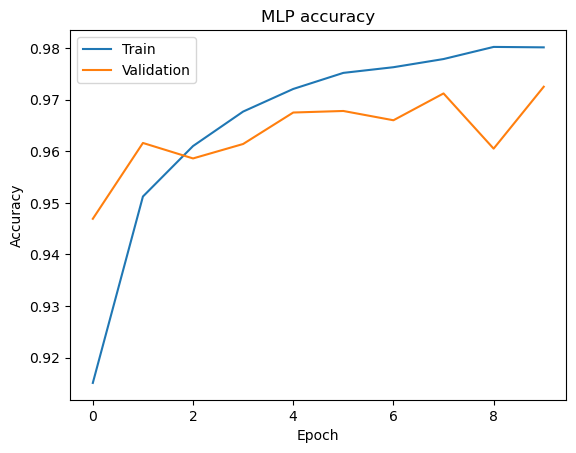

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
model=Sequential()
model.add(Dense(units=1024,activation='tanh',input_shape=(784,)))
model.add(Dense(units=512,activation='tanh'))
model.add(Dense(units=256,activation='tanh'))
model.add(Dense(units=256,activation='tanh'))
model.add(Dense(units=10,activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),verbose=2)
result=model.evaluate(x_test,y_test,verbose=0)
print("인식률",result[1]*100,"%")
plt.title('MLP accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'], loc='upper left')
plt.show()


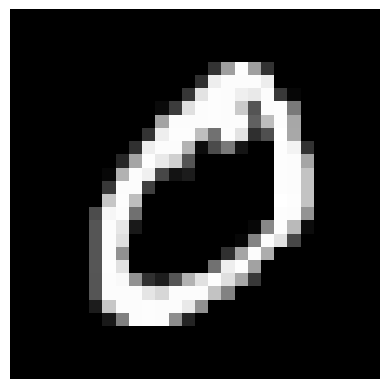

Label: 0


In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#mnist데이터로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#첫번째 이미지 출력
plt.imshow(train_images[1], cmap='gray')
plt.axis('off')
plt.show()

#첫번째 이미지라벨출력
print("Label:", train_labels[1])

Epoch 1/10
1875/1875 - 20s - loss: 0.1292 - accuracy: 0.9604 - val_loss: 0.0433 - val_accuracy: 0.9857 - 20s/epoch - 11ms/step
Epoch 2/10
1875/1875 - 19s - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0326 - val_accuracy: 0.9903 - 19s/epoch - 10ms/step
Epoch 3/10
1875/1875 - 19s - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0326 - val_accuracy: 0.9901 - 19s/epoch - 10ms/step
Epoch 4/10
1875/1875 - 23s - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0308 - val_accuracy: 0.9901 - 23s/epoch - 12ms/step
Epoch 5/10
1875/1875 - 22s - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0359 - val_accuracy: 0.9904 - 22s/epoch - 12ms/step
Epoch 6/10
1875/1875 - 24s - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0295 - val_accuracy: 0.9913 - 24s/epoch - 13ms/step
Epoch 7/10
1875/1875 - 24s - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0310 - val_accuracy: 0.9912 - 24s/epoch - 13ms/step
Epoch 8/10
1875/1875 - 24s - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0362 - val_accuracy: 0.9904 - 24s/ep

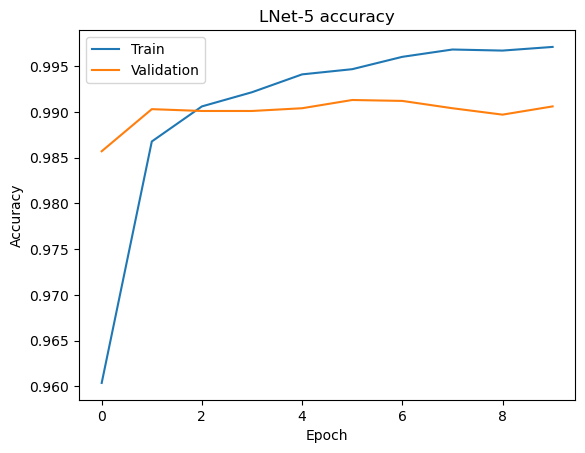

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
model=Sequential()
model.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(5,5),padding='same',activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(120,(5,5),padding='same',activation='relu')) 
model.add(Flatten())
model.add(Dense(84,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),verbose=2) 
result=model.evaluate(x_test,y_test,verbose=0)
print("인식률",result[1]*100,"%")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LNet-5 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.show()